In [20]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import scipy.linalg 


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Here is visualization of the graph.  We can ignore actions and only consider the Laplacian

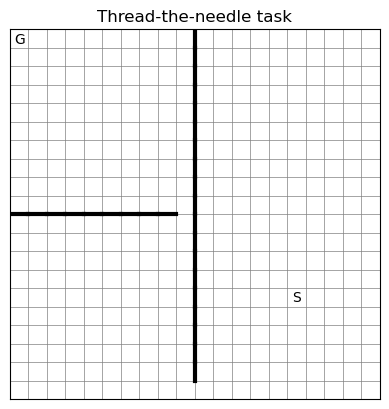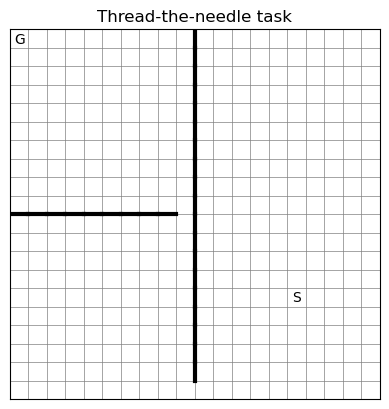

In [21]:
laplacian = np.loadtxt('grid_world_laplacian.csv', delimiter=',')
laplacian

array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  3., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  3., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

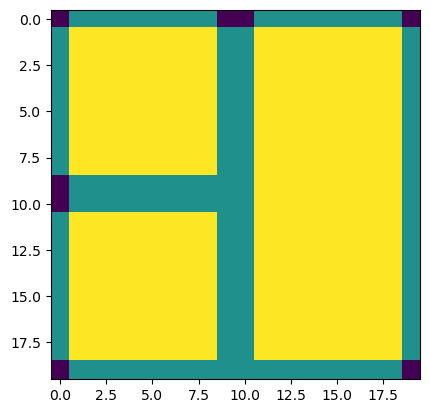

In [22]:
# plot the degree matrix, reshaped into the grid-world shape
plt.imshow(np.diag(laplacian).reshape(20, 20))

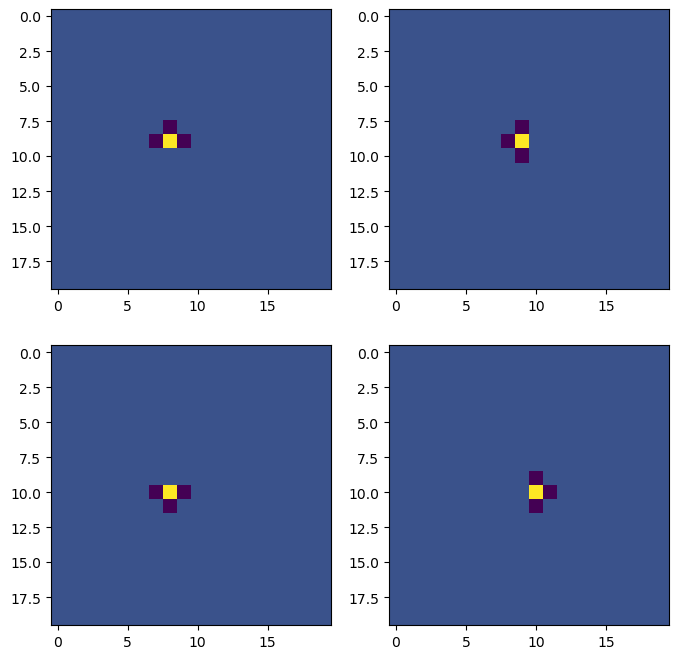

In [23]:
# the adjacency matrix looked wrong to me at first glance, but it's correct.  Bottleneck states
# don't necessarily have a different degree than their neighbors.  There is a bottle neck between
# the states at row 9 and row 10, column 9. Importantly, while the adjacency pattern changes, the 
# degree doesn't


fig, axes = plt.subplots(2,2,figsize=(8, 8) )

row = 9
col = 8
state = row * 20 + col
axes[0][0].imshow(laplacian[state].reshape(20, 20))

row = 10
col = 8
state = row * 20 + col
axes[1][0].imshow(laplacian[state].reshape(20, 20))

row = 9
col = 9
state = row * 20 + col
axes[0][1].imshow(laplacian[state].reshape(20, 20))

row = 10
col = 10
state = row * 20 + col
axes[1][1].imshow(laplacian[state].reshape(20, 20))


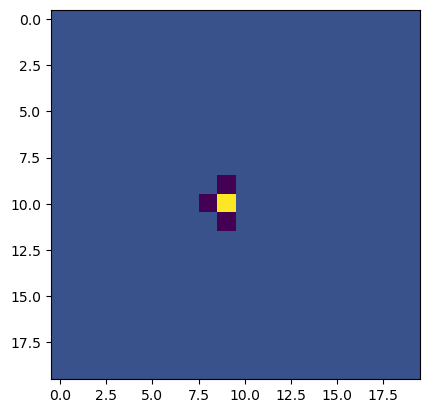

In [24]:

row = 10
col = 9

state = row * 20 + col
plt.imshow(laplacian[state].reshape(20, 20))

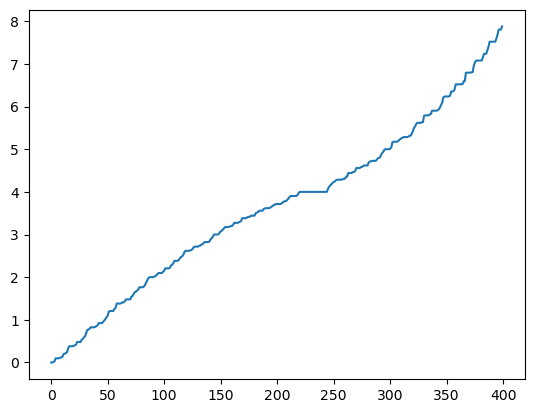

In [62]:
eigenvalues, eigenvectors = np.linalg.eig(laplacian)

idx = np.argsort(eigenvalues)

# sort by the eigenvalues
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

plt.plot(eigenvalues)

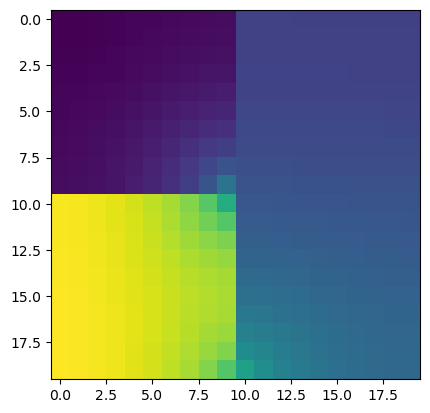

In [63]:
plt.imshow(eigenvectors[:, 2].reshape(20, 20))

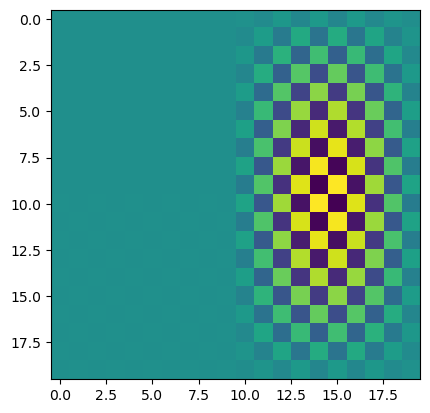

In [64]:
plt.imshow(eigenvectors[:, -1].reshape(20, 20))

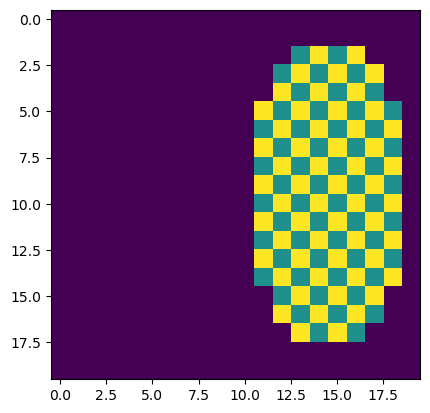

In [65]:
# kmeans = KMeans(n_clusters=3,  n_init="auto").fit(eigenvectors)
kmeans = KMeans(n_clusters=3,  n_init="auto"
               ).fit(eigenvectors[:, -1].reshape(-1, 1))

plt.imshow(kmeans.labels_.reshape(20, 20))